In [381]:
#DS Basics
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import spicy 
from math import sqrt
from matplotlib.cm import coolwarm
from statistics import median
import seaborn as sns
#this is for classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn import tree
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.utils import shuffle


from sklearn.svm import SVR
from sklearn import linear_model

#model metrics
from sklearn.model_selection import cross_val_score

#cross validation
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [382]:
credit = pd.read_csv("creditV2.csv")

In [383]:
credit.head()

,Unnamed: 0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
0,0,1,20000,2,2,1,24,2,2,-1,...,0,0,0,0,689,0,0,0,0,1
1,1,2,120000,2,2,2,26,-1,2,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,2,3,90000,2,2,2,34,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,3,4,50000,2,2,1,37,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,4,5,50000,1,2,1,57,-1,0,-1,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [384]:
credit.head()

,Unnamed: 0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
0,0,1,20000,2,2,1,24,2,2,-1,...,0,0,0,0,689,0,0,0,0,1
1,1,2,120000,2,2,2,26,-1,2,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,2,3,90000,2,2,2,34,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,3,4,50000,2,2,1,37,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,4,5,50000,1,2,1,57,-1,0,-1,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [385]:
#remove a row or a column using the .drop() function.
#axis=0 for row, and axis=1 for column.
#permanently delete a row/column
#you have to set inplace=True
credit.drop(("ID"), axis=1, inplace=True)

In [386]:
credit.drop(("Unnamed: 0"), axis=1, inplace=True)

In [387]:
#going to change names for default_payment_next_month to just default
credit.rename(columns={"default_payment_next_month":"default"},inplace=True)
credit.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [388]:
credit.shape

(30000, 24)

In [389]:
credit["default"].count()

30000

In [390]:
#had to find what columns stopped where
credit.iloc[:,14].name

'BILL_AMT4'

In [391]:
creditV1 = credit

Distribution of Customers' Credit Limits


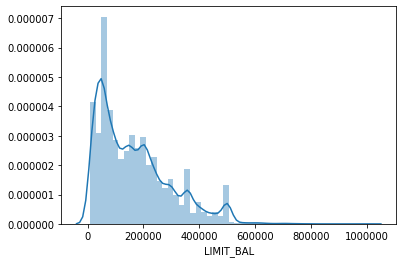

In [392]:
# Distribution of credit limit, with an overlay of a density plot
sns.distplot(creditV1['LIMIT_BAL'])
print("Distribution of Customers' Credit Limits")


In [393]:
#edit on original data
# Discretize LIMIT_BAL into 5 bins
# 1: <100k
# 2: 100k-190k
# 3: 200k-290k
# 4: 300-390k
# 5: 400k+
Limit_Bins = np.array([0,150000,250000,350000,450000])


In [394]:
creditV1["Limit_Bins"] = Limit_Bins.searchsorted(credit.LIMIT_BAL)


In [395]:
creditV1.groupby('Limit_Bins')['Limit_Bins'].count()

Limit_Bins
1    16400
2     6883
3     3360
4     2126
5     1231
Name: Limit_Bins, dtype: int64

In [396]:
creditV1.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default,Limit_Bins
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,689,0,0,0,0,1,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3455,3261,0,1000,1000,1000,0,2000,1,1
2,90000,2,2,2,34,0,0,0,0,0,...,14948,15549,1518,1500,1000,1000,1000,5000,0,1
3,50000,2,2,1,37,0,0,0,0,0,...,28959,29547,2000,2019,1200,1100,1069,1000,0,1
4,50000,1,2,1,57,-1,0,-1,0,0,...,19146,19131,2000,36681,10000,9000,689,679,0,1


<function matplotlib.pyplot.show(*args, **kw)>

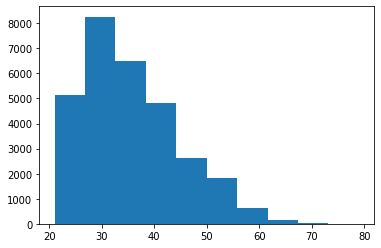

In [404]:
plt.hist(creditV1["AGE"])
plt.show

In [408]:
creditV1.AGE.describe()

count    30000.000000
mean        35.485500
std          9.217904
min         21.000000
25%         28.000000
50%         34.000000
75%         41.000000
max         79.000000
Name: AGE, dtype: float64

In [405]:
#edit on original data
# Grouping age into groups
# 1: < 34 millenials
# 2: 35-50 Gen X
# 3: 50-70 Baby Boomers
Age_Bins = np.array([0,28,35,42,50])


In [406]:
creditV1["Age_Bins"] = Age_Bins.searchsorted(credit.AGE)


In [407]:
creditV1.groupby('Age_Bins')['Age_Bins'].count()


Age_Bins
1    8013
2    8796
3    6535
4    4387
5    2269
Name: Age_Bins, dtype: int64

In [409]:
creditV2 = creditV1.loc[:, list(credit.columns[2:4])+ list(creditV1.columns[5:8])+list(creditV1.columns[11:14])+ list(creditV1.columns[17:20])+list(creditV1.columns[23:])]
creditV2.head()

,EDUCATION,MARRIAGE,PAY_1,PAY_2,PAY_3,BILL_AMT1,BILL_AMT2,BILL_AMT3,PAY_AMT1,PAY_AMT2,PAY_AMT3,default,Limit_Bins,Age_Bins
0,2,1,2,2,-1,3913,3102,689,0,689,0,1,1,1
1,2,2,-1,2,0,2682,1725,2682,0,1000,1000,1,1,1
2,2,2,0,0,0,29239,14027,13559,1518,1500,1000,0,1,2
3,2,1,0,0,0,46990,48233,49291,2000,2019,1200,0,1,3
4,2,1,-1,0,-1,8617,5670,35835,2000,36681,10000,0,1,5


In [411]:
creditV1.shape

(30000, 26)

In [412]:
creditV2.shape

(30000, 14)

In [413]:
#the result will tell us how many rows we have
#that are duplicates
creditV2.duplicated().sum()

803

In [414]:
creditV2.drop_duplicates(keep="first").shape

(29197, 14)

In [415]:
#this will remove the 2nd duplicate
creditV2 = creditV2.drop_duplicates(keep="first")

In [416]:
creditV2.duplicated().sum()

0

In [417]:
creditV2.shape

(29197, 14)

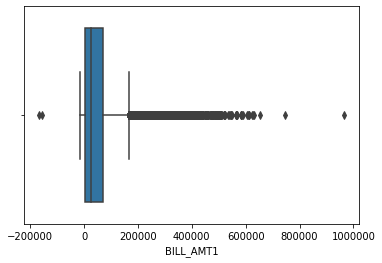

In [418]:
#checking any outliers
#the box plot will result in showing Q1 and Q3 with the median in box with
#whisker of 
sns.boxplot(x=creditV2["BILL_AMT1"])

In [419]:
creditV2.describe()

,EDUCATION,MARRIAGE,PAY_1,PAY_2,PAY_3,BILL_AMT1,BILL_AMT2,BILL_AMT3,PAY_AMT1,PAY_AMT2,PAY_AMT3,default,Limit_Bins,Age_Bins
count,29197.000000,29197.000000,29197.000000,29197.000000,29197.000000,29197.000000,29197.000000,2.919700e+04,29197.000000,2.919700e+04,29197.000000,29197.000000,29197.000000,29197.000000
mean,1.860534,1.553242,-0.017502,-0.087064,-0.121314,52629.792239,50529.602973,4.830417e+04,5818.725622,6.083328e+03,5368.665137,0.219098,1.826969,2.470665
std,0.791318,0.522493,1.114614,1.174008,1.170672,74144.877062,71672.058956,6.985226e+04,16762.699156,2.333453e+04,17826.025096,0.413642,1.135012,1.238872
min,0.000000,0.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,0.000000,0.000000e+00,0.000000,0.000000,1.000000,1.000000
25%,1.000000,1.000000,-1.000000,-1.000000,-1.000000,4485.000000,3888.000000,3.567000e+03,1086.000000,1.000000e+03,524.000000,0.000000,1.000000,1.000000
50%,2.000000,2.000000,0.000000,0.000000,0.000000,24285.000000,23149.000000,2.125500e+04,2222.000000,2.100000e+03,1986.000000,0.000000,1.000000,2.000000
75%,2.000000,2.000000,0.000000,0.000000,0.000000,69164.000000,66114.000000,6.220100e+04,5100.000000,5.000000e+03,4750.000000,0.000000,2.000000,3.000000
max,6.000000,3.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,873552.000000,1.684259e+06,896040.000000,1.000000,5.000000,5.000000


In [420]:
median(creditV2["BILL_AMT1"])


24285

In [421]:
creditV1.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default,Limit_Bins,Age_Bins
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,689,0,0,0,0,1,1,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3261,0,1000,1000,1000,0,2000,1,1,1
2,90000,2,2,2,34,0,0,0,0,0,...,15549,1518,1500,1000,1000,1000,5000,0,1,2
3,50000,2,2,1,37,0,0,0,0,0,...,29547,2000,2019,1200,1100,1069,1000,0,1,3
4,50000,1,2,1,57,-1,0,-1,0,0,...,19131,2000,36681,10000,9000,689,679,0,1,5


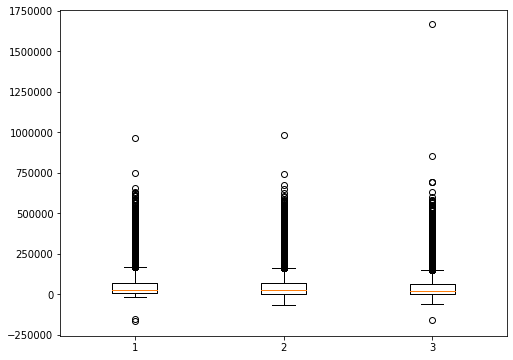

In [422]:
#making Bill_Amts into one data 
Bill_Amts = creditV2["BILL_AMT1"],creditV2["BILL_AMT2"],creditV2["BILL_AMT3"]
fig = plt.figure(1, figsize=(8, 6))

# Create an axes instance
ax = fig.add_subplot(111)

# Create the boxplot
bp = ax.boxplot(Bill_Amts)


In [423]:
creditV2[creditV2["BILL_AMT3"] > 600000].count()

EDUCATION     6
MARRIAGE      6
PAY_1         6
PAY_2         6
PAY_3         6
BILL_AMT1     6
BILL_AMT2     6
BILL_AMT3     6
PAY_AMT1      6
PAY_AMT2      6
PAY_AMT3      6
default       6
Limit_Bins    6
Age_Bins      6
dtype: int64

In [424]:
creditV2[creditV2["default"] ==1].count()

EDUCATION     6397
MARRIAGE      6397
PAY_1         6397
PAY_2         6397
PAY_3         6397
BILL_AMT1     6397
BILL_AMT2     6397
BILL_AMT3     6397
PAY_AMT1      6397
PAY_AMT2      6397
PAY_AMT3      6397
default       6397
Limit_Bins    6397
Age_Bins      6397
dtype: int64

In [425]:
##
corrMat = creditV1.corr().round(decimals=3)
print(corrMat)

            LIMIT_BAL    SEX  EDUCATION  MARRIAGE    AGE  PAY_1  PAY_2  PAY_3  \
LIMIT_BAL       1.000  0.025     -0.219    -0.108  0.145 -0.271 -0.296 -0.286   
SEX             0.025  1.000      0.014    -0.031 -0.091 -0.058 -0.071 -0.066   
EDUCATION      -0.219  0.014      1.000    -0.143  0.175  0.105  0.122  0.114   
MARRIAGE       -0.108 -0.031     -0.143     1.000 -0.414  0.020  0.024  0.033   
AGE             0.145 -0.091      0.175    -0.414  1.000 -0.039 -0.050 -0.053   
PAY_1          -0.271 -0.058      0.105     0.020 -0.039  1.000  0.672  0.574   
PAY_2          -0.296 -0.071      0.122     0.024 -0.050  0.672  1.000  0.767   
PAY_3          -0.286 -0.066      0.114     0.033 -0.053  0.574  0.767  1.000   
PAY_4          -0.267 -0.060      0.109     0.033 -0.050  0.539  0.662  0.777   
PAY_5          -0.249 -0.055      0.098     0.036 -0.054  0.509  0.623  0.687   
PAY_6          -0.235 -0.044      0.082     0.034 -0.049  0.475  0.576  0.633   
BILL_AMT1       0.285 -0.034

In [426]:
corrMat.style.background_gradient(cmap='bwr')

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default,Limit_Bins,Age_Bins
LIMIT_BAL,1,0.025,-0.219,-0.108,0.145,-0.271,-0.296,-0.286,-0.267,-0.249,-0.235,0.285,0.278,0.283,0.294,0.296,0.29,0.195,0.178,0.21,0.203,0.217,0.22,-0.154,0.956,0.139
SEX,0.025,1,0.014,-0.031,-0.091,-0.058,-0.071,-0.066,-0.06,-0.055,-0.044,-0.034,-0.031,-0.025,-0.022,-0.017,-0.017,-0,-0.001,-0.009,-0.002,-0.002,-0.003,-0.04,-0.001,-0.087
EDUCATION,-0.219,0.014,1,-0.143,0.175,0.105,0.122,0.114,0.109,0.098,0.082,0.024,0.019,0.013,-0,-0.008,-0.009,-0.037,-0.03,-0.04,-0.038,-0.04,-0.037,0.028,-0.199,0.173
MARRIAGE,-0.108,-0.031,-0.143,1,-0.414,0.02,0.024,0.033,0.033,0.036,0.034,-0.023,-0.022,-0.025,-0.023,-0.025,-0.021,-0.006,-0.008,-0.004,-0.013,-0.001,-0.007,-0.024,-0.098,-0.412
AGE,0.145,-0.091,0.175,-0.414,1,-0.039,-0.05,-0.053,-0.05,-0.054,-0.049,0.056,0.054,0.054,0.051,0.049,0.048,0.026,0.022,0.029,0.021,0.023,0.019,0.014,0.139,0.966
PAY_1,-0.271,-0.058,0.105,0.02,-0.039,1,0.672,0.574,0.539,0.509,0.475,0.187,0.19,0.18,0.179,0.181,0.177,-0.079,-0.07,-0.071,-0.064,-0.058,-0.059,0.325,-0.245,-0.042
PAY_2,-0.296,-0.071,0.122,0.024,-0.05,0.672,1,0.767,0.662,0.623,0.576,0.235,0.235,0.224,0.222,0.221,0.219,-0.081,-0.059,-0.056,-0.047,-0.037,-0.037,0.264,-0.266,-0.051
PAY_3,-0.286,-0.066,0.114,0.033,-0.053,0.574,0.767,1,0.777,0.687,0.633,0.208,0.237,0.227,0.227,0.225,0.222,0.001,-0.067,-0.053,-0.046,-0.036,-0.036,0.235,-0.256,-0.053
PAY_4,-0.267,-0.06,0.109,0.033,-0.05,0.539,0.662,0.777,1,0.82,0.716,0.203,0.226,0.245,0.246,0.243,0.239,-0.009,-0.002,-0.069,-0.043,-0.034,-0.027,0.217,-0.24,-0.05
PAY_5,-0.249,-0.055,0.098,0.036,-0.054,0.509,0.623,0.687,0.82,1,0.817,0.207,0.227,0.243,0.272,0.27,0.263,-0.006,-0.003,0.009,-0.058,-0.033,-0.023,0.204,-0.224,-0.053


In [429]:
creditCorr = creditV2.corr().round(decimals=2)

In [430]:
creditCorr.style.background_gradient(cmap='bwr')

,EDUCATION,MARRIAGE,PAY_1,PAY_2,PAY_3,BILL_AMT1,BILL_AMT2,BILL_AMT3,PAY_AMT1,PAY_AMT2,PAY_AMT3,default,Limit_Bins,Age_Bins
EDUCATION,1,-0.14,0.11,0.11,0.1,0.02,0.01,0.01,-0.04,-0.03,-0.04,0.03,-0.2,0.17
MARRIAGE,-0.14,1,0.02,0.02,0.03,-0.03,-0.02,-0.03,-0.01,-0.01,-0,-0.02,-0.1,-0.41
PAY_1,0.11,0.02,1,0.71,0.6,0.19,0.2,0.19,-0.08,-0.07,-0.07,0.33,-0.25,-0.04
PAY_2,0.11,0.02,0.71,1,0.75,0.22,0.22,0.21,-0.1,-0.07,-0.07,0.28,-0.27,-0.05
PAY_3,0.1,0.03,0.6,0.75,1,0.19,0.22,0.21,-0.01,-0.08,-0.07,0.25,-0.26,-0.05
BILL_AMT1,0.02,-0.03,0.19,0.22,0.19,1,0.95,0.89,0.13,0.1,0.15,-0.02,0.25,0.05
BILL_AMT2,0.01,-0.02,0.2,0.22,0.22,0.95,1,0.93,0.28,0.1,0.15,-0.01,0.24,0.05
BILL_AMT3,0.01,-0.03,0.19,0.21,0.21,0.89,0.93,1,0.24,0.31,0.13,-0.01,0.25,0.05
PAY_AMT1,-0.04,-0.01,-0.08,-0.1,-0.01,0.13,0.28,0.24,1,0.28,0.25,-0.07,0.19,0.02
PAY_AMT2,-0.03,-0.01,-0.07,-0.07,-0.08,0.1,0.1,0.31,0.28,1,0.24,-0.06,0.17,0.02


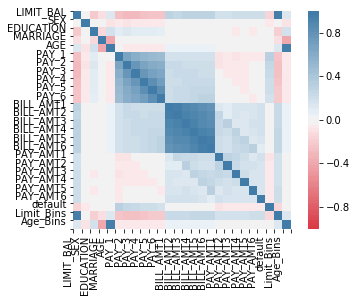

In [432]:
#i removed columns that I believed were not necessary

fig = plt.figure()
ax = sns.heatmap(corrMat,vmin=-1,vmax=1,center=0, cmap=sns.diverging_palette(10, 240, n=75),square=True)
ticks = np.arange(0,27,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(creditV1,rotation=90,horizontalalignment='right')
ax.set_yticklabels(creditV1) 
plt.show()


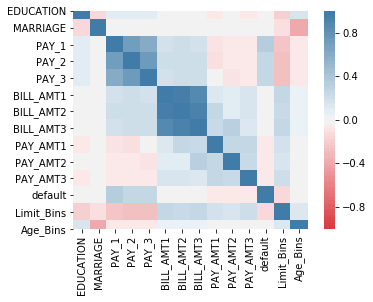

In [433]:

fig1 = plt.figure()
ax1 = sns.heatmap(creditCorr,vmin=-1,vmax=1,center=0, cmap=sns.diverging_palette(11, 240, n=75),square=True)
ticks1 = np.arange(0,25,1)
ax.set_xticks(ticks1)
ax.set_yticks(ticks1)
ax.set_xticklabels(creditV2,rotation=90,horizontalalignment='right')
ax.set_yticklabels(creditV2)
plt.show()

In [436]:
#had to find what columns stopped where
creditV2.iloc[:,11].name

'default'

In [438]:
#selectin features 
#removing default_next_month_payment
features = creditV2.loc[:, list(creditV2.columns[0:11])+ list(creditV2.columns[12:])]
features.head()

,EDUCATION,MARRIAGE,PAY_1,PAY_2,PAY_3,BILL_AMT1,BILL_AMT2,BILL_AMT3,PAY_AMT1,PAY_AMT2,PAY_AMT3,Limit_Bins,Age_Bins
0,2,1,2,2,-1,3913,3102,689,0,689,0,1,1
1,2,2,-1,2,0,2682,1725,2682,0,1000,1000,1,1
2,2,2,0,0,0,29239,14027,13559,1518,1500,1000,1,2
3,2,1,0,0,0,46990,48233,49291,2000,2019,1200,1,3
4,2,1,-1,0,-1,8617,5670,35835,2000,36681,10000,1,5


In [439]:
X_train = (features[:4000])
X_train.shape

(4000, 13)

In [440]:
X_test = features[-1500:]
X_test_count = len(X_test.index)
print('The number of observations in the feature testing set is:',str(X_test_count))
print(X_test.head())

The number of observations in the feature testing set is: 1500
       EDUCATION  MARRIAGE  PAY_1  PAY_2  PAY_3  BILL_AMT1  BILL_AMT2  \
28441          1         1      0      0      0     121603     125098   
28442          2         2      2      2      2      38757      41302   
28443          2         3      0      0      0      63908      55028   
28444          2         1      0      0      0      12106      10946   
28445          2         1      0      0      0      24735      27555   

       BILL_AMT3  PAY_AMT1  PAY_AMT2  PAY_AMT3  Limit_Bins  Age_Bins  
28441      94769     30000     25000     50007           3         3  
28442      39247      4300         0      9076           1         3  
28443      44654     10051      5013      3044           1         3  
28444      11968      1184      1206      1216           1         3  
28445      29798      3555      3000      2028           1         4  


In [441]:
#making dependent variable
#this is going to by y_train soon in the bottom
depVar = creditV2["default"]
depVar.head()

0    1
1    1
2    0
3    0
4    0
Name: default, dtype: int64

In [442]:
y_train = depVar[:4000]
y_train_count = len(y_train.index)
print('The number of observations in the Y training set are:',str(y_train_count))
y_train.head()

The number of observations in the Y training set are: 4000


0    1
1    1
2    0
3    0
4    0
Name: default, dtype: int64

In [443]:
y_test = depVar[-1500:]
y_test_count = len(y_test.index)
print('The number of observations in the Y training set are:',str(y_test_count))
y_test.head()

The number of observations in the Y training set are: 1500


28441    0
28442    0
28443    0
28444    0
28445    0
Name: default, dtype: int64

In [444]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train)


In [445]:
X_train.shape, X_test.shape

((3000, 13), (1000, 13))

In [446]:
#Models
rf = RandomForestClassifier(n_estimators=3000, random_state=450,min_samples_leaf=150,n_jobs=10)
dt = tree.DecisionTreeClassifier(min_samples_leaf=150,random_state=450)
svc = SVC(gamma='auto')
knn=KNeighborsClassifier(leaf_size=150, n_jobs=10, n_neighbors=10, p=2)


In [447]:
rfModel= rf.fit(X_train,y_train)
print(rfModel)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=150, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=3000,
                       n_jobs=10, oob_score=False, random_state=450, verbose=0,
                       warm_start=False)


In [448]:
rfpreds = rfModel.predict(X_test)
print(rfpreds)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

In [449]:
rfaccuracy = accuracy_score(y_test,rfpreds)
print(rfaccuracy)

0.765


In [450]:
rfclas_rep = classification_report(y_test,rfpreds)
print(rfclas_rep)

              precision    recall  f1-score   support

           0       0.77      1.00      0.87       765
           1       0.00      0.00      0.00       235

    accuracy                           0.77      1000
   macro avg       0.38      0.50      0.43      1000
weighted avg       0.59      0.77      0.66      1000



c:\users\jason\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [451]:
rf_conmat = confusion_matrix(y_test,rfpreds)
print(rf_conmat)

[[765   0]
 [235   0]]


In [452]:
knnModel = knn.fit(X_train, y_train)
print(knnModel)

KNeighborsClassifier(algorithm='auto', leaf_size=150, metric='minkowski',
                     metric_params=None, n_jobs=10, n_neighbors=10, p=2,
                     weights='uniform')


In [453]:
knnpreds = knnModel.predict(X_test)
print(knnpreds)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

In [454]:
knnaccuracy = accuracy_score(y_test,knnpreds)
print(knnaccuracy)

0.76


In [455]:
knnclas_rep = classification_report(y_test,knnpreds)
print(knnclas_rep)

              precision    recall  f1-score   support

           0       0.77      0.98      0.86       765
           1       0.38      0.03      0.06       235

    accuracy                           0.76      1000
   macro avg       0.57      0.51      0.46      1000
weighted avg       0.68      0.76      0.67      1000



In [456]:
knn_conmat = (confusion_matrix(y_test,knnpreds))
print(knn_conmat)

[[752  13]
 [227   8]]


In [457]:
Lsvcmodel = svc.fit(X_train,y_train)
print(Lsvcmodel)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


In [458]:
Lsvcpreds = Lsvcmodel.predict(X_test)
print(Lsvcpreds)

[0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

In [459]:
Lsvcaccuracy = accuracy_score(y_test,Lsvcpreds)
print(Lsvcaccuracy)

0.772


In [460]:
Lsvcclass_rep = classification_report(y_test,Lsvcpreds)
print(Lsvcclass_rep)

              precision    recall  f1-score   support

           0       0.77      1.00      0.87       765
           1       0.82      0.04      0.07       235

    accuracy                           0.77      1000
   macro avg       0.79      0.52      0.47      1000
weighted avg       0.78      0.77      0.68      1000



In [461]:
Lsvc_conmat = confusion_matrix(y_test,Lsvcpreds)
print(Lsvc_conmat)

[[763   2]
 [226   9]]


In [462]:
dtmodel = dt.fit(X_train,y_train)
print(dtmodel)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=150, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=450, splitter='best')


In [463]:
dtpreds = dtmodel.predict(X_test)
print(dtpreds)

[0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 1
 0 1 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 1 

In [464]:
dtaccuracy = accuracy_score(y_test,dtpreds)
print(dtaccuracy)

0.8


In [465]:
dtclass_rep = classification_report(y_test,dtpreds)
print(dtclass_rep)

              precision    recall  f1-score   support

           0       0.81      0.96      0.88       765
           1       0.67      0.29      0.40       235

    accuracy                           0.80      1000
   macro avg       0.74      0.62      0.64      1000
weighted avg       0.78      0.80      0.77      1000



In [466]:
dt_conmat = confusion_matrix(y_test,dtpreds)

print(dt_conmat)

[[732  33]
 [167  68]]


In [467]:
X_train, X_test, y_train, y_test = train_test_split(X_train,y_train, test_size=.30)

In [468]:
model2 = rf.fit(X_train,y_train)
model2

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=150, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=3000,
                       n_jobs=10, oob_score=False, random_state=450, verbose=0,
                       warm_start=False)

In [469]:
preds2= model2.predict(X_test)
accscore = accuracy_score(y_test,preds2)
print(accscore)

0.7833333333333333


In [470]:
classrep = classification_report(y_test,preds2)
print(classrep)

              precision    recall  f1-score   support

           0       0.78      1.00      0.88       705
           1       0.00      0.00      0.00       195

    accuracy                           0.78       900
   macro avg       0.39      0.50      0.44       900
weighted avg       0.61      0.78      0.69       900



c:\users\jason\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [471]:
confusion_matrix(y_test,preds2)

array([[705,   0],
       [195,   0]], dtype=int64)

In [472]:
#had to find what columns stopped where
credit.iloc[:,23].name

'default'

[0.06953282 0.01178399 0.03400652 0.02191351 0.07084516 0.09959447
 0.04669186 0.03438276 0.03092452 0.02863515 0.03069484 0.05374714
 0.04986827 0.0479903  0.04777953 0.0464541  0.0480576  0.04691342
 0.04506349 0.04454009 0.04411364 0.04646684]


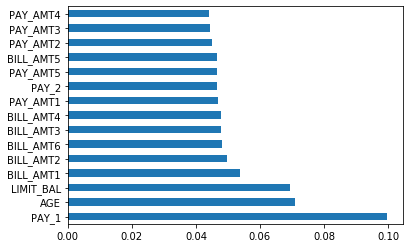

In [473]:
X_sample = credit.iloc[:,0:22]  #independent columns
y_sample = credit.iloc[:,23]    #target column i.e price range
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier(n_estimators=200)
model.fit(X_sample,y_sample)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X_sample.columns)
feat_importances.nlargest(15).plot(kind='barh')
plt.show()

In [474]:
Subset0 = creditV2[creditV2.default == 0]

In [475]:
Subset0.shape

(22800, 14)

In [476]:
Subset0.head()

,EDUCATION,MARRIAGE,PAY_1,PAY_2,PAY_3,BILL_AMT1,BILL_AMT2,BILL_AMT3,PAY_AMT1,PAY_AMT2,PAY_AMT3,default,Limit_Bins,Age_Bins
2,2,2,0,0,0,29239,14027,13559,1518,1500,1000,0,1,2
3,2,1,0,0,0,46990,48233,49291,2000,2019,1200,0,1,3
4,2,1,-1,0,-1,8617,5670,35835,2000,36681,10000,0,1,5
5,1,2,0,0,0,64400,57069,57608,2500,1815,657,0,1,3
6,1,2,0,0,0,367965,412023,445007,55000,40000,38000,0,5,2


In [477]:
Subset1 = creditV2[creditV2.default == 1]

In [478]:
Subset1.head()

,EDUCATION,MARRIAGE,PAY_1,PAY_2,PAY_3,BILL_AMT1,BILL_AMT2,BILL_AMT3,PAY_AMT1,PAY_AMT2,PAY_AMT3,default,Limit_Bins,Age_Bins
0,2,1,2,2,-1,3913,3102,689,0,689,0,1,1,1
1,2,2,-1,2,0,2682,1725,2682,0,1000,1000,1,1,1
13,2,2,1,2,2,65802,67369,65701,3200,0,3000,1,1,2
16,1,2,0,0,2,15376,18010,17428,3200,0,1500,1,1,1
21,2,1,-1,-1,-1,316,316,316,316,316,0,1,1,3


In [479]:
Sub0 = pd.DataFrame(Subset0.sample(n=6000))

In [480]:
Sub0.shape

(6000, 14)

In [481]:
Sub0.head()

,EDUCATION,MARRIAGE,PAY_1,PAY_2,PAY_3,BILL_AMT1,BILL_AMT2,BILL_AMT3,PAY_AMT1,PAY_AMT2,PAY_AMT3,default,Limit_Bins,Age_Bins
18766,2,2,1,-2,-1,0,0,233,0,233,0,0,2,1
11924,1,2,-2,-2,-2,23414,23349,0,1000,0,3180,0,1,2
13131,2,2,0,0,0,55731,57239,57183,3000,1800,1000,0,1,1
18557,2,2,0,0,2,20123,19184,16834,2880,0,1166,0,1,1
23473,1,2,-1,-1,-2,2609,0,0,0,0,0,0,4,2


In [482]:
Subset1.shape

(6397, 14)

In [483]:
Subset1.head()

,EDUCATION,MARRIAGE,PAY_1,PAY_2,PAY_3,BILL_AMT1,BILL_AMT2,BILL_AMT3,PAY_AMT1,PAY_AMT2,PAY_AMT3,default,Limit_Bins,Age_Bins
0,2,1,2,2,-1,3913,3102,689,0,689,0,1,1,1
1,2,2,-1,2,0,2682,1725,2682,0,1000,1000,1,1,1
13,2,2,1,2,2,65802,67369,65701,3200,0,3000,1,1,2
16,1,2,0,0,2,15376,18010,17428,3200,0,1500,1,1,1
21,2,1,-1,-1,-1,316,316,316,316,316,0,1,1,3


In [484]:
Sub1 = pd.DataFrame(Subset1.sample(n=6000))

In [485]:
Sub1.shape

(6000, 14)

In [487]:
Creditv3 = pd.concat([Sub0,Sub1])
Creditv3.head()

,EDUCATION,MARRIAGE,PAY_1,PAY_2,PAY_3,BILL_AMT1,BILL_AMT2,BILL_AMT3,PAY_AMT1,PAY_AMT2,PAY_AMT3,default,Limit_Bins,Age_Bins
18766,2,2,1,-2,-1,0,0,233,0,233,0,0,2,1
11924,1,2,-2,-2,-2,23414,23349,0,1000,0,3180,0,1,2
13131,2,2,0,0,0,55731,57239,57183,3000,1800,1000,0,1,1
18557,2,2,0,0,2,20123,19184,16834,2880,0,1166,0,1,1
23473,1,2,-1,-1,-2,2609,0,0,0,0,0,0,4,2


In [488]:
#frac specifies the fraction of rows to return in random sample, frac=1 means return all rows
#.reset_index prevents from creating a column containing the old index entries
newcredit = Creditv3.sample(frac=1).reset_index(drop=True)
newcredit.head()

,EDUCATION,MARRIAGE,PAY_1,PAY_2,PAY_3,BILL_AMT1,BILL_AMT2,BILL_AMT3,PAY_AMT1,PAY_AMT2,PAY_AMT3,default,Limit_Bins,Age_Bins
0,2,1,0,0,0,156993,159482,161921,8000,6500,7000,0,2,4
1,2,2,0,0,0,131575,130931,132969,6700,6000,1291,0,1,2
2,3,2,2,0,0,98285,94075,92857,4300,4300,7400,0,1,5
3,2,1,0,0,0,20593,20187,19130,2002,3001,2000,0,3,2
4,1,2,0,0,0,44421,45897,46920,2500,2100,2000,0,1,1


In [489]:
newcredit.shape

(12000, 14)

In [490]:
#newcredit1 = shuffle(smallcredit)
#newcredit1.shape

In [491]:
#had to find what columns stopped where
newcredit.iloc[:,11].name

'default'

In [492]:
featuresV2 = newcredit.loc[:, list(creditV2.columns[0:10])+ list(creditV2.columns[12:])]
featuresV2.head()
#X_train, X_test, y_train, y_test = train_test_split(X_train,y_train, test_size=.30)

,EDUCATION,MARRIAGE,PAY_1,PAY_2,PAY_3,BILL_AMT1,BILL_AMT2,BILL_AMT3,PAY_AMT1,PAY_AMT2,Limit_Bins,Age_Bins
0,2,1,0,0,0,156993,159482,161921,8000,6500,2,4
1,2,2,0,0,0,131575,130931,132969,6700,6000,1,2
2,3,2,2,0,0,98285,94075,92857,4300,4300,1,5
3,2,1,0,0,0,20593,20187,19130,2002,3001,3,2
4,1,2,0,0,0,44421,45897,46920,2500,2100,1,1


In [493]:
X_train1 = featuresV2[:3000]
X_train1.shape

(3000, 12)

In [494]:
X_test1 = featuresV2[-1500:]
X_test_count1 = len(X_test1.index)
print('The number of observations in the feature testing set is:',str(X_test_count1))
X_test1.shape

The number of observations in the feature testing set is: 1500


(1500, 12)

In [495]:
#making dependent variable
#this is going to by y_train soon in the bottom
depVar1 = newcredit["default"]
print("default")
depVar1.head()

default


0    0
1    0
2    0
3    0
4    0
Name: default, dtype: int64

In [496]:
y_train1 = depVar1[:3000]
y_train_count1 = len(y_train1.index)
print('The number of observations in the Y training set are:',str(y_train_count1))
y_train1.head()

The number of observations in the Y training set are: 3000


0    0
1    0
2    0
3    0
4    0
Name: default, dtype: int64

In [497]:
y_test1 = depVar[-1500:]
y_test_count1 = len(y_test1.index)
print('The number of observations in the Y training set are:',str(y_test_count1))
y_test1.head()

The number of observations in the Y training set are: 1500


28441    0
28442    0
28443    0
28444    0
28445    0
Name: default, dtype: int64

In [498]:
y_test1.shape

(1500,)

In [499]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_train1, y_train1)


In [500]:
X_train1.shape,X_test1.shape

((2250, 12), (750, 12))

In [501]:
rfModel1= rf.fit(X_train1,y_train1)
print(rfModel1)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=150, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=3000,
                       n_jobs=10, oob_score=False, random_state=450, verbose=0,
                       warm_start=False)


In [502]:
rfpredsv1 = rfModel1.predict(X_test1)
print(rfpredsv1)


[1 0 0 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 1 1 0 1 1 0 0 0 1 1 0
 0 0 0 0 1 0 1 0 0 1 0 1 0 0 1 0 0 1 0 1 1 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0 1
 0 1 1 1 0 1 1 0 0 0 1 0 0 1 0 1 1 0 1 1 0 0 0 0 0 1 0 1 0 0 1 1 1 1 1 0 0
 0 1 0 0 1 0 0 0 1 0 0 1 1 1 0 0 0 0 0 0 1 1 1 0 0 0 1 1 0 0 0 1 1 0 0 1 0
 1 0 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 0 0 1 0 1 1 0 0 0 0 0 0 1 1 1 0 1 0 0 1
 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0
 1 1 0 0 0 1 1 0 1 1 1 0 1 1 0 1 0 0 1 0 1 1 1 0 1 1 1 0 0 0 1 1 0 0 0 0 1
 1 0 1 1 1 0 0 0 0 1 1 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1 0 0 0 0 1 1 1 0 1 0 1
 1 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 1 0 0 0 1 1 0 0 0 1 0 1 0 0 0 1 0 0
 1 1 1 0 1 0 0 1 0 1 1 0 1 1 0 1 0 0 0 1 0 0 0 1 1 1 1 1 0 1 1 1 1 0 0 0 1
 0 0 0 0 0 0 0 1 0 1 1 1 1 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 1 0 1 1 1 1 0
 0 1 1 1 0 1 1 0 0 0 0 1 0 1 1 1 1 1 1 0 0 0 0 0 1 1 0 1 0 1 1 1 1 0 1 0 0
 0 0 1 0 0 1 0 1 0 0 1 0 1 1 0 0 0 0 0 1 0 1 1 0 1 1 0 1 1 1 0 0 0 1 1 0 0
 1 1 1 1 1 1 0 1 0 0 1 0 

In [503]:
rfaccuracy1 = accuracy_score(y_test1,rfpredsv1)
print(rfaccuracy1)

0.6933333333333334


In [504]:
confusion_matrix(y_test1,rfpredsv1)

array([[277,  79],
       [151, 243]], dtype=int64)

In [505]:
knnModel1 = knn.fit(X_train1, y_train1)
knnpreds1 = knnModel1.predict(X_test1)
knnaccuracy1 = accuracy_score(y_test1,knnpreds1)
print(knnaccuracy1)

0.5746666666666667


In [506]:
knn_conmat1 = confusion_matrix(y_test1,knnpreds1)

print(knn_conmat1)

[[244 112]
 [207 187]]


In [507]:
dtmodel1 = dt.fit(X_train1, y_train1)
dtpreds1 = dtmodel1.predict(X_test1)
dtaccuracy1 = accuracy_score(y_test1,dtpreds1)
print(dtaccuracy1)

0.696


In [508]:
dt_conmat1 = confusion_matrix(y_test1,dtpreds1)

print(dt_conmat1)

[[268  88]
 [140 254]]
